In [ ]:
from matplotlib import animation
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mco


##konstanten

L = 1 
a = 1
pi = np.pi

def sin(x,k):
    return np.sin(k*pi*x/L)

def T(x,t):
    return x*L + sin(x,1) * L**4/(a**2*pi**4)* (np.exp(-pi**2/L**2*a*t) + t * pi**2/L**2*a - 1) + np.exp(-4*pi**2/L**2*a*t) * sin(x,2)
                                                                                                         
x = np.linspace(0,L,100)
t0 = np.linspace(0,0.05,500)

t = np.append(t0,np.linspace(0.05,100,1000))

                                                                                                         
                                                                            
                                                                                                         
fig = plt.figure(dpi = 200)

ax = plt.axes()
plt.axis()
ax.set_title("Heat distribution changing over time")
line, = ax.plot([], [], lw=2)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# animation function.  This is called sequentially
def animate(i):
    heat = T(x,t[i])
    
    ax.clear()
    ax.set_xlabel("$x$ in m")
    ax.set_ylabel("Temperature $T$ in K")
    ax.set_xlim(0,L)
    ax.set_ylim(-1,11)
    ax.plot(x,heat,c= 'b',lw = 1,label = "$t=%f s$" %t[i])
    plt.legend(loc=1)
    
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=1500, interval=20, blit=True)

# save the animation as an mp4.  This requires ffmpeg or mencoder to be
# installed.  The extra_args ensure that the x264 codec is used, so that
# the video can be embedded in html5.  You may need to adjust this for
# your system: for more information, see
# http://matplotlib.sourceforge.net/api/animation_api.html
anim.save('heat_anim.mp4', fps=100, extra_args=['-vcodec', 'libx264'])

plt.show()                                                                                                        

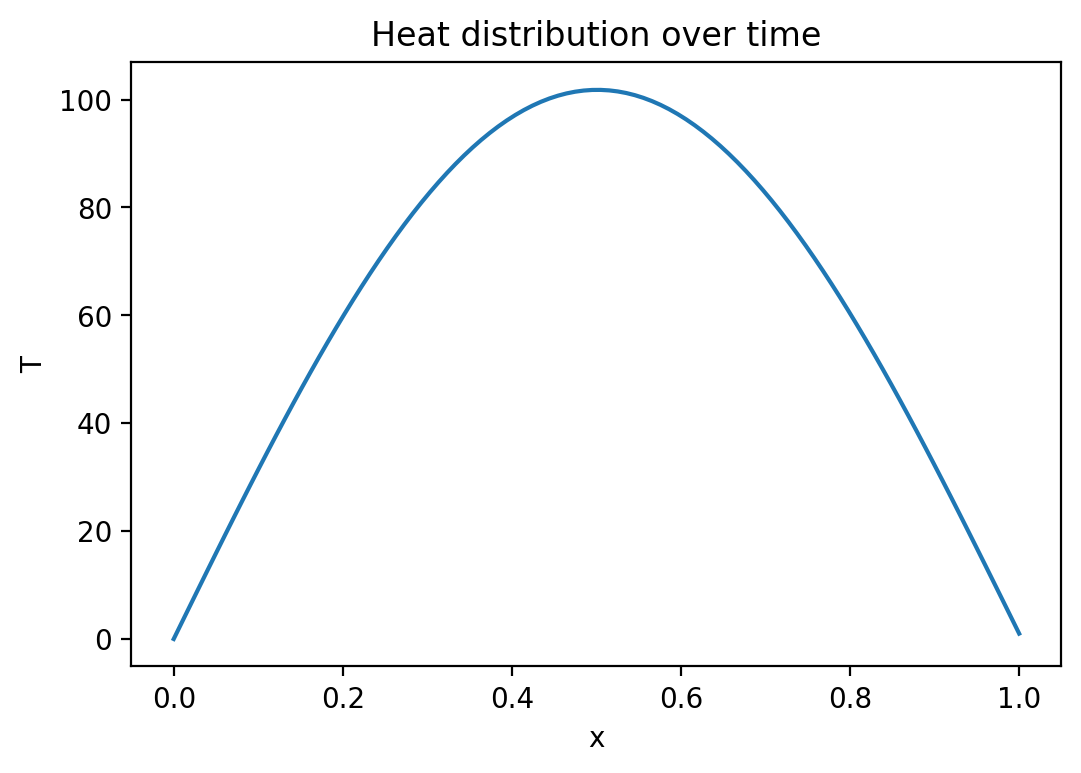

In [10]:
#tests

x = np.linspace(0,L,100)
plt.figure(dpi=200)
plt.title("Heat distribution over time")
plt.ylabel("T")
plt.xlabel("x")
plt.plot(x,T(x,1000))
